# Global Power Plant Database

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [140]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


## EDA

### `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
### `country_long` (text): longer form of the country designation
### `name` (text): name or title of the power plant, generally in Romanized form
### `gppd_idnr` (text): 10 or 12 character identifier for the power plant
### `capacity_mw` (number): electrical generating capacity in megawatts
### `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
### `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
### `primary_fuel` (text): energy source used in primary electricity generation or export
### `other_fuel1` (text): energy source used in electricity generation or export
### `other_fuel2` (text): energy source used in electricity generation or export
### `other_fuel3` (text): energy source used in electricity generation or export
###  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
###  `owner` (text): majority shareholder of the power plant, generally in Romanized form
###  `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
###  `url` (text): web document corresponding to the `source` field
### `geolocation_source` (text): attribution for geolocation information
### `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
### `year_of_capacity_data` (number): year the capacity information was reported
### `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
### `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
### `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
### `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
### `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
### `generation_data_source` (text): attribution for the reported generation information
### `estimated_generation_gwh` (number): estimated electricity generation in gigawatt-hours for the year.

In [141]:
df.shape

(908, 25)

In [142]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [143]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

### We can delete other_fuel1, other_fuel2, other_fuel3, wepp_id and estimated_genration_gwh as the null values are more for these columns.

In [144]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [145]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [146]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [147]:
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [148]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Dr Ssk ltd                                     1
Navbharat                                      1
Chettinad Corp ltd                             1
Bannari Sugars ltd                             1
Lokmangal Lokmangal group                      1
Name: source, Length: 191, dtype: int64

In [149]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [150]:
df['owner'].value_counts()

Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Jk Cement ltd                               4
Tata Power Solar Systems Limited (TPREL)    3
Government of India                         3
                                           ..
Maral Overseas ltd                          1
Natural Alliend indust                      1
India Ltd icl)                              1
Shamanur Sugars ltd                         1
Lokmangal Lokmangal group                   1
Name: owner, Length: 280, dtype: int64

In [151]:
df['owner'].nunique()

280

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

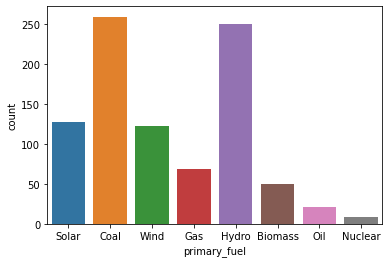

In [152]:
sns.countplot(df['primary_fuel'])

### Most of the plants are Coal and Hydro based.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

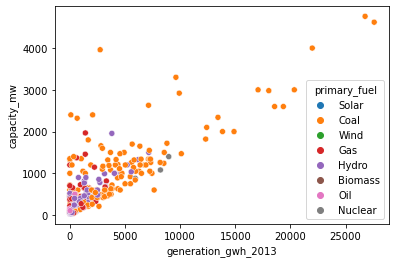

In [153]:
sns.scatterplot(x='generation_gwh_2013',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

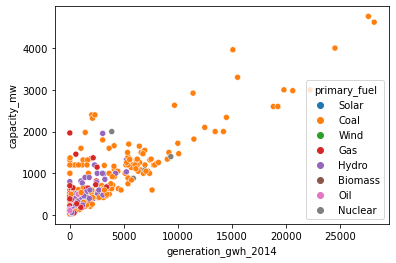

In [154]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

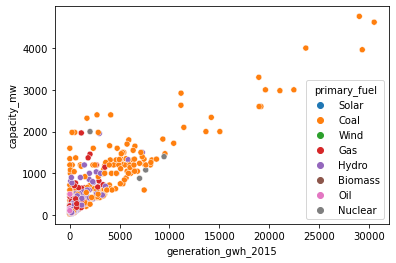

In [155]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

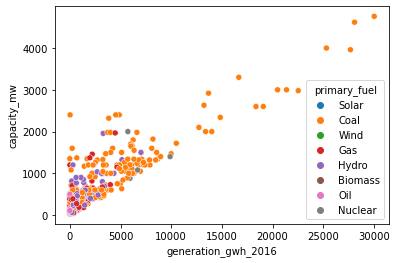

In [156]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

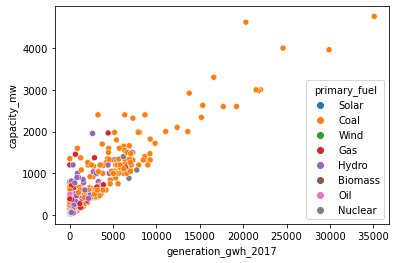

In [157]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel',data=df)

### For all the years, As the generation is more, the capacity will also be more.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

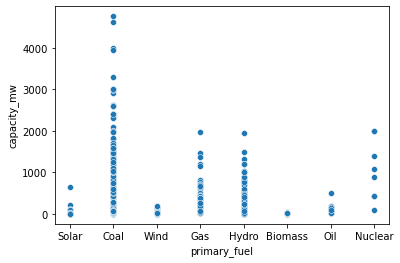

In [158]:
sns.scatterplot(df['primary_fuel'],df['capacity_mw'])

### The plants with Coal as their primary fuel has more Capacity.

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

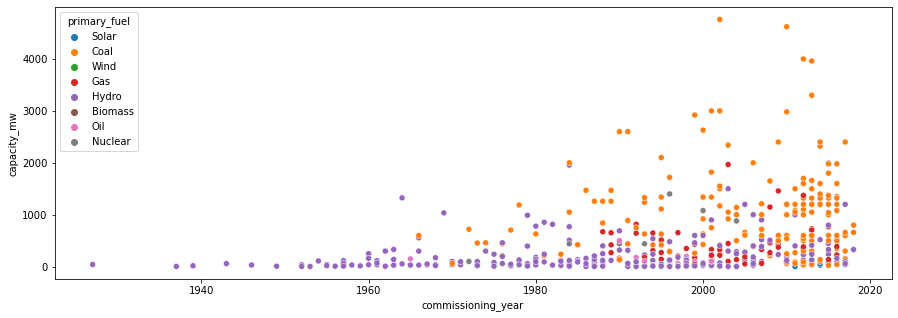

In [160]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['commissioning_year'],y=df['capacity_mw'],hue=df['primary_fuel'])

### The oldest plants are Hydro Plants to generate Power.

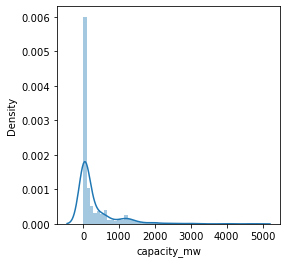

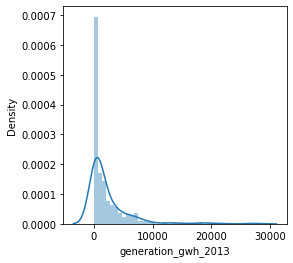

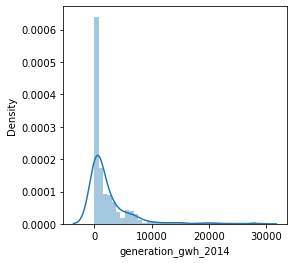

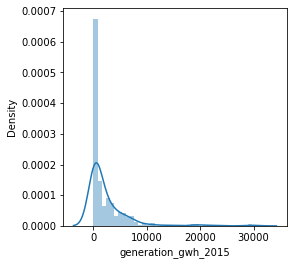

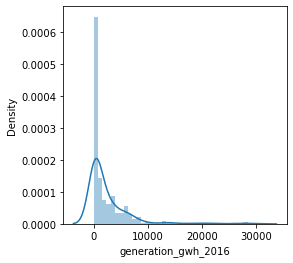

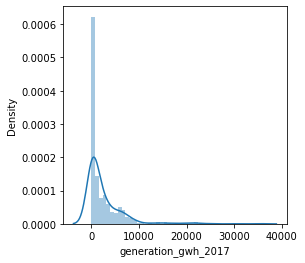

In [161]:
t=['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for i in t:
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])

### The distribution is normal but the data is right skewed.

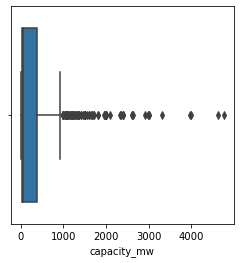

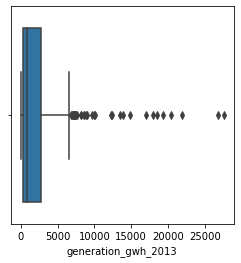

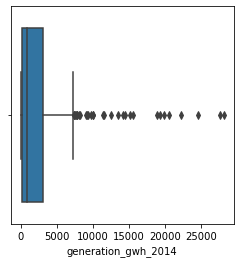

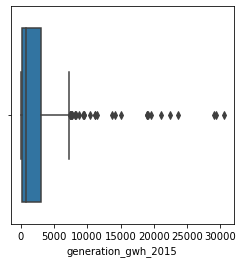

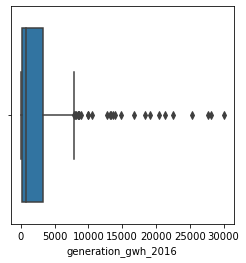

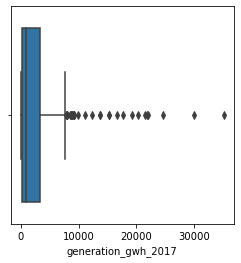

In [162]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### Outliers are present in all the columns

In [163]:
cor=df.corr()

<AxesSubplot:>

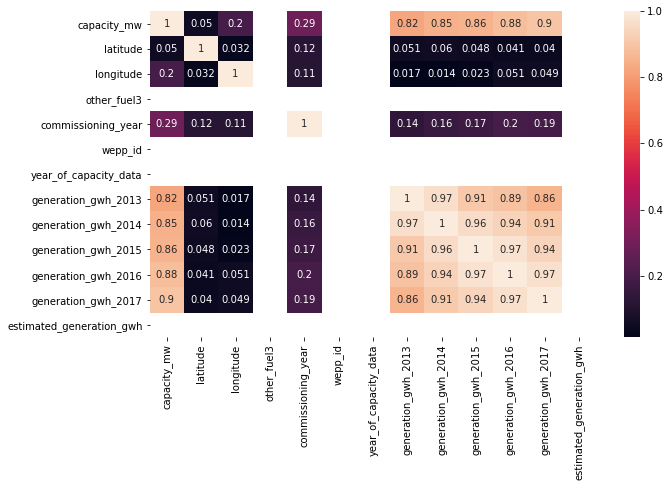

In [164]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [165]:
df.drop(['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel1',
         'other_fuel2','other_fuel3','owner','geolocation_source','source','url',
         'wepp_id','year_of_capacity_data','estimated_generation_gwh','generation_data_source'],axis=1,inplace=True)

### These columns are not required for prediction, since they does not make any significant relation with output.

In [166]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,2004.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,Coal,2015.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [167]:
df["generation_gwh_2013"].fillna(0, inplace = True)
df["generation_gwh_2014"].fillna(0, inplace = True)
df["generation_gwh_2015"].fillna(0, inplace = True)
df["generation_gwh_2016"].fillna(0, inplace = True)
df["generation_gwh_2017"].fillna(0, inplace = True)

In [168]:
solar=[]
coal=[]
wind=[]
gas=[]
hyd=[]
biom=[]
oil=[]
nucle=[]
g=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for i in g:
    for j in df.index:
        if df['primary_fuel'][j]=='Solar':
            solar.append(df[i][j])
        elif df['primary_fuel'][j]=='Coal':
            coal.append(df[i][j])
        elif df['primary_fuel'][j]=='Wind':
            wind.append(df[i][j])
        elif df['primary_fuel'][j]=='Gas':
            gas.append(df[i][j])
        elif df['primary_fuel'][j]=='Hydro':
            hyd.append(df[i][j])
        elif df['primary_fuel'][j]=='Biomass':
            biom.append(df[i][j])
        elif df['primary_fuel'][j]=='Oil':
            oil.append(df[i][j])
        elif df['primary_fuel'][j]=='Nuclear':
            nucle.append(df[i][j])

### We are doing this to convert all the 0 values to its corresponding minimum values based on the primary fuel used in the plant.

In [169]:
solar.sort()
solar=set(solar)
coal.sort()
coal=set(coal)
wind.sort()
wind=set(wind)
gas.sort()
gas=set(gas)
hyd.sort()
hyd=set(hyd)
biom.sort()
biom=set(biom)
oil.sort()
oil=set(oil)
nucle.sort()
nucle=set(nucle)

### We are converting list into a set to eliminate the duplicate values present in the list. 

In [170]:
print(solar)
print(coal)
print(wind)
print(gas)
print(hyd)
print(biom)
print(oil)
print(nucle)

{0.0}
{0.0, 6147.8, 4.313400000000001, 4.8713500000000005, 6.34865, 4101.53, 8197.0, 6153.76, 4106.29, 11.472449999999998, 8197.97, 20486.0, 6159.621, 18.909, 19.6378, 20.24275, 21.7304, 22.0, 22.755, 24.151775, 25.2816, 2074.31, 2066.39, 2068.276, 4117.339, 4117.682, 4126.3208, 12312.0, 34.7098, 8227.0, 38.21225, 6182.0409, 6189.11, 2096.0, 49.923, 51.9464, 2100.03, 54.64, 2102.0, 2103.8239, 59.29676499999999, 72.825, 73.131513, 2120.68, 6216.6381, 77.3344, 4175.29, 6224.0, 6225.693, 4179.266, 6229.793, 92.44, 12381.0, 95.0, 2143.39, 4191.364, 6243.0, 2152.69, 6249.927, 106.5792, 4208.389, 117.654, 12406.0, 120.90364, 122.02, 20603.0, 124.92480000000002, 124.7792, 125.38, 4222.614, 0.2805, 18560.0, 6274.226, 2180.429, 4229.98, 14471.0, 26761.39, 2189.0, 150.952, 2205.11, 163.611, 166.92, 6311.0, 171.355, 6316.03, 173.1111, 173.234, 174.145, 12467.0, 10422.69, 6327.03, 184.214, 2236.9908, 191.56, 6335.0, 6337.0, 6337.63, 196.23, 196.7602, 197.872, 198.288, 6341.202, 6345.2487, 6348.3, 

In [171]:
solar=min(solar)
coal=sorted(coal)[1]
wind=min(wind)
gas=sorted(gas)[1]
hyd=sorted(hyd)[1]
biom=min(biom)
oil=sorted(oil)[1]
nucle=sorted(nucle)[1]
for i in g:
    for j in df.index:
        if df['primary_fuel'][j]=='Solar' and df[i][j]==0:
            df[i][j]=solar
        elif df['primary_fuel'][j]=='Coal' and df[i][j]==0:
            df[i][j]=coal
        elif df['primary_fuel'][j]=='Wind' and df[i][j]==0:
            df[i][j]=wind
        elif df['primary_fuel'][j]=='Gas' and df[i][j]==0:
            df[i][j]=gas
        elif df['primary_fuel'][j]=='Hydro' and df[i][j]==0:
            df[i][j]=hyd
        elif df['primary_fuel'][j]=='Biomass' and df[i][j]==0:
            df[i][j]=biom
        elif df['primary_fuel'][j]=='Oil' and df[i][j]==0:
            df[i][j]=oil
        elif df['primary_fuel'][j]=='Nuclear' and df[i][j]==0:
            df[i][j]=nucle

### Here, we are assigning values with 0 that are present in generation_gwh columns to corrosponding minimum values. 

In [172]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,2011.0,0.000000,0.000000,0.0000,0.000000,0.000000
1,98.0,Coal,NaN,0.118300,0.118300,0.1183,0.118300,0.118300
2,39.2,Wind,NaN,0.000000,0.000000,0.0000,0.000000,0.000000
3,135.0,Gas,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,Coal,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736


## Encoding

In [173]:
cate=['primary_fuel','commissioning_year']
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in cate:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [174]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6,65,0.000000,0.000000,0.0000,0.000000,0.000000
1,98.0,1,73,0.118300,0.118300,0.1183,0.118300,0.118300
2,39.2,7,73,0.000000,0.000000,0.0000,0.000000,0.000000
3,135.0,2,58,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,1,69,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736


## Removing Outliers

In [175]:
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker.

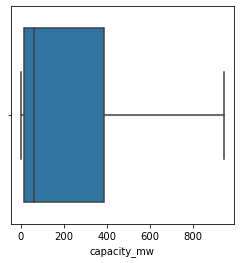

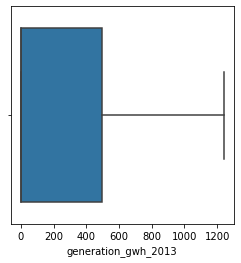

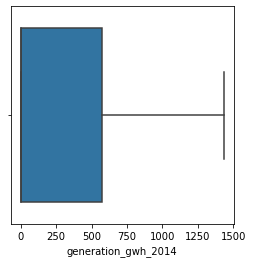

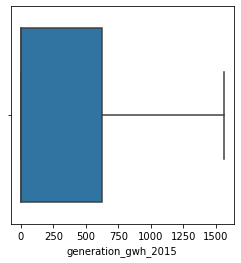

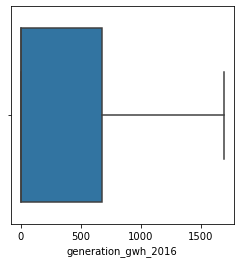

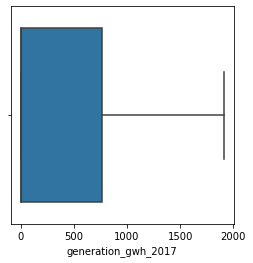

In [176]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### Outliers have been succesfully removed from the data.

## Skewness Removal

In [177]:
df.skew()

capacity_mw            1.306045
primary_fuel           0.471141
commissioning_year    -1.412618
generation_gwh_2013    1.177475
generation_gwh_2014    1.179174
generation_gwh_2015    1.197756
generation_gwh_2016    1.173742
generation_gwh_2017    1.184206
dtype: float64

In [178]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
for i in t:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

In [179]:
df.skew()

capacity_mw           -0.004587
primary_fuel           0.471141
commissioning_year    -1.412618
generation_gwh_2013    0.448886
generation_gwh_2014    0.417215
generation_gwh_2015    0.342268
generation_gwh_2016    0.297255
generation_gwh_2017    0.287658
dtype: float64

## i.) Prediction of Capacity in MW

In [180]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

## Scaling

In [181]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.225418,0.287082,-0.832436,-0.845559,-0.881813,-0.902605,-0.907327
1,-0.967486,0.764611,-0.766466,-0.783112,-0.824721,-0.849275,-0.855461
2,1.663998,0.764611,-0.832436,-0.845559,-0.881813,-0.902605,-0.907327
3,-0.528905,-0.130755,1.255113,1.215393,1.222304,1.193662,1.114079
4,-0.967486,0.525846,1.349192,1.339121,1.322393,1.307121,1.305122


## VIF

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.308632,primary_fuel
1,1.425619,commissioning_year
2,13.380169,generation_gwh_2013
3,19.209574,generation_gwh_2014
4,15.809053,generation_gwh_2015
5,23.928839,generation_gwh_2016
6,13.630388,generation_gwh_2017


### We should drop the column with highest VIF score until all the values are below 5.

In [183]:
x.drop(['generation_gwh_2016'],axis=1,inplace=True)

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.305369,primary_fuel
1,1.417753,commissioning_year
2,13.186137,generation_gwh_2013
3,18.993851,generation_gwh_2014
4,10.871549,generation_gwh_2015
5,6.197699,generation_gwh_2017


In [185]:
x.drop(['generation_gwh_2014'],axis=1,inplace=True)

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.304670,primary_fuel
1,1.417082,commissioning_year
2,5.411616,generation_gwh_2013
3,9.202612,generation_gwh_2015
4,6.113224,generation_gwh_2017


In [187]:
x.drop(['generation_gwh_2015'],axis=1,inplace=True)

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.299936,primary_fuel
1,1.416934,commissioning_year
2,3.656527,generation_gwh_2013
3,3.452181,generation_gwh_2017


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity in data is removed.

## Choosing Random State Value

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.7607259366878585 ran state= 151


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [191]:
from sklearn.model_selection import GridSearchCV

### Lasso Regression

In [192]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': False, 'random_state': 6, 'selection': 'random'}


In [193]:
ls = Lasso(alpha=0.001,fit_intercept=False,random_state=6,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

76.28905598208449

In [194]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.4967341320295471


### Ridge

In [195]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'max_iter': 1, 'normalize': False}


In [196]:
rd = Ridge(alpha=1,copy_X=True,max_iter=1,normalize=False)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

76.05906144557078

In [197]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.49913746162745504


### Linear Regression

In [198]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': True}


In [199]:
lr=LinearRegression(copy_X=True,fit_intercept=False,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

76.31546209570762

In [200]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.4964574565859174


### Decision Tree Regression

In [209]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,11)),'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}


In [210]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

84.56929174465196

In [211]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.40072137620359116


## Cross Validation

In [212]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y,cv=5).mean())*100
cv3=(cross_val_score(lr,x,y,cv=5).mean())*100
cv4=(cross_val_score(dtr,x,y,cv=5).mean())*100
print(cv1,cv2,cv3,cv4)

67.58662963172716 67.48598892070065 67.5870164157579 79.325164217007


In [213]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

8.702426350357328 8.573072524870128 8.728445679949715 5.244127527644963


### We can choose Decision Tree Regressor as our model, since its r2 score and cv_score has least difference.

In [214]:
fin_dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,max_features='auto',splitter='best')
fin_dtr.fit(x_train,y_train)
pred=fin_dtr.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

84.56929174465195

## Saving the Model

In [215]:
import joblib
joblib.dump(fin_dtr,'Final_capacity_mod.pkl')

['Final_capacity_mod.pkl']

## ii.) Predicting Primary_Fuel

In [216]:
df['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

### Here, There is a class imbalance in the output.

In [217]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.675017,6,65,-0.832436,-0.845559,-0.881813,-0.902605,-0.907327
1,0.193946,1,73,-0.766466,-0.783112,-0.824721,-0.849275,-0.855461
2,-0.314403,7,73,-0.832436,-0.845559,-0.881813,-0.902605,-0.907327
3,0.373830,2,58,1.255113,1.215393,1.222304,1.193662,1.114079
4,1.481523,1,69,1.349192,1.339121,1.322393,1.307121,1.305122


<AxesSubplot:>

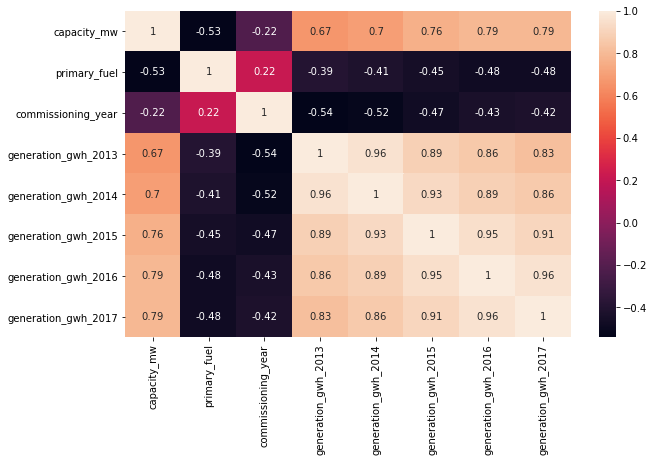

In [218]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [219]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

## VIF

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,2.829920,capacity_mw
1,1.024822,commissioning_year
2,12.951856,generation_gwh_2013
3,19.225020,generation_gwh_2014
4,15.925830,generation_gwh_2015
5,24.023780,generation_gwh_2016
6,13.990712,generation_gwh_2017


### We should drop the column with highest VIF score until all the values are below 5.

In [221]:
x.drop(['generation_gwh_2016'],axis=1,inplace=True)

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,2.797428,capacity_mw
1,1.024702,commissioning_year
2,12.792045,generation_gwh_2013
3,19.018359,generation_gwh_2014
4,11.222188,generation_gwh_2015
5,6.927186,generation_gwh_2017


In [224]:
x.drop(['generation_gwh_2014'],axis=1,inplace=True)

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,2.791130,capacity_mw
1,1.024697,commissioning_year
2,4.963157,generation_gwh_2013
3,9.489993,generation_gwh_2015
4,6.822344,generation_gwh_2017


In [226]:
x.drop(['generation_gwh_2015'],axis=1,inplace=True)

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,2.696450,capacity_mw
1,1.024532,commissioning_year
2,3.168606,generation_gwh_2013
3,4.706021,generation_gwh_2017


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity in data is removed.

## Scaling

In [228]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,capacity_mw,commissioning_year,generation_gwh_2013,generation_gwh_2017
0,-1.675017,0.287082,-0.832436,-0.907327
1,0.193946,0.764611,-0.766466,-0.855461
2,-0.314403,0.764611,-0.832436,-0.907327
3,0.373830,-0.130755,1.255113,1.114079
4,1.481523,0.525846,1.349192,1.305122


## Sampling

In [229]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [230]:
y.value_counts()

0    259
2    259
4    259
6    259
1    259
3    259
5    259
7    259
Name: primary_fuel, dtype: int64

## Choosing Random State Value

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.8867469879518072 ran state= 48


In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxran)

## Model Selection

### Decision Tree Classifier

In [233]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
dtc_clas1=classification_report(y_test,pred1)
acc1=accuracy_score(y_test,pred1)
print(acc1)
print(dtc_clas1)

0.8891566265060241
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        45
           1       0.93      0.89      0.91        57
           2       0.80      0.92      0.86        49
           3       0.87      0.84      0.85        55
           4       0.98      0.96      0.97        68
           5       1.00      0.98      0.99        48
           6       0.91      0.80      0.85        50
           7       0.80      0.84      0.82        43

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.88       415
weighted avg       0.89      0.89      0.89       415



In [234]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,pred1)
con1

array([[39,  0,  0,  0,  0,  0,  1,  5],
       [ 0, 51,  2,  4,  0,  0,  0,  0],
       [ 0,  1, 45,  2,  1,  0,  0,  0],
       [ 0,  1,  8, 46,  0,  0,  0,  0],
       [ 0,  2,  1,  0, 65,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 47,  0,  0],
       [ 6,  0,  0,  0,  0,  0, 40,  4],
       [ 4,  0,  0,  0,  0,  0,  3, 36]], dtype=int64)

### Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred2=rfc.predict(x_test)
rfc_clas2=classification_report(y_test,pred2)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print(rfc_clas2)

0.8867469879518072
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        45
           1       0.96      0.88      0.92        57
           2       0.74      0.98      0.84        49
           3       0.93      0.75      0.83        55
           4       0.97      0.97      0.97        68
           5       1.00      1.00      1.00        48
           6       0.91      0.80      0.85        50
           7       0.80      0.84      0.82        43

    accuracy                           0.89       415
   macro avg       0.89      0.88      0.88       415
weighted avg       0.90      0.89      0.89       415



In [236]:
con2=confusion_matrix(y_test,pred2)
con2

array([[39,  0,  0,  0,  0,  0,  1,  5],
       [ 0, 50,  3,  3,  1,  0,  0,  0],
       [ 0,  0, 48,  0,  1,  0,  0,  0],
       [ 0,  1, 13, 41,  0,  0,  0,  0],
       [ 0,  1,  1,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0],
       [ 6,  0,  0,  0,  0,  0, 40,  4],
       [ 4,  0,  0,  0,  0,  0,  3, 36]], dtype=int64)

### Support Vectors

In [237]:
from sklearn.svm import SVC
sup=SVC()
sup.fit(x_train,y_train)
pred3=sup.predict(x_test)
sv_clas3=classification_report(y_test,pred3)
acc3=accuracy_score(y_test,pred3)
print(acc3)
print(sv_clas3)

0.6771084337349398
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        45
           1       0.70      0.12      0.21        57
           2       0.56      0.63      0.60        49
           3       0.83      0.69      0.75        55
           4       0.69      1.00      0.82        68
           5       0.98      1.00      0.99        48
           6       0.79      0.62      0.70        50
           7       0.50      0.30      0.38        43

    accuracy                           0.68       415
   macro avg       0.69      0.67      0.64       415
weighted avg       0.70      0.68      0.64       415



In [238]:
con3=confusion_matrix(y_test,pred3)
con3

array([[45,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  7, 10,  2, 22,  0,  0,  7],
       [ 2,  2, 31,  6,  4,  1,  0,  3],
       [ 0,  1, 12, 38,  4,  0,  0,  0],
       [ 0,  0,  0,  0, 68,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0],
       [14,  0,  2,  0,  0,  0, 31,  3],
       [22,  0,  0,  0,  0,  0,  8, 13]], dtype=int64)

### KNN Classifier

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)
pred4=knn1.predict(x_test)
sv_clas4=classification_report(y_test,pred4)
acc4=accuracy_score(y_test,pred4)
print(acc4)
print(sv_clas4)

0.8
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        45
           1       0.75      0.67      0.70        57
           2       0.69      0.90      0.78        49
           3       0.87      0.73      0.79        55
           4       0.91      0.88      0.90        68
           5       0.98      1.00      0.99        48
           6       0.84      0.76      0.80        50
           7       0.63      0.72      0.67        43

    accuracy                           0.80       415
   macro avg       0.80      0.80      0.80       415
weighted avg       0.81      0.80      0.80       415



In [240]:
con4=confusion_matrix(y_test,pred4)
con4

array([[33,  0,  0,  0,  0,  0,  1, 11],
       [ 0, 38,  6,  4,  5,  0,  0,  4],
       [ 1,  2, 44,  1,  0,  1,  0,  0],
       [ 0,  5,  9, 40,  1,  0,  0,  0],
       [ 0,  5,  2,  1, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0],
       [ 6,  1,  2,  0,  0,  0, 38,  3],
       [ 5,  0,  1,  0,  0,  0,  6, 31]], dtype=int64)

## Cross Validation

In [241]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=5).mean()
cv2=cross_val_score(rfc,x,y,cv=5).mean()
cv3=cross_val_score(sup,x,y,cv=5).mean()
cv4=cross_val_score(knn1,x,y,cv=5).mean()
print(cv1,cv2,cv3,cv4)

0.8262720447005414 0.8489587334846634 0.6467271986496712 0.7799452883999767


In [242]:
print((acc1-cv1),(acc2-cv2),(acc3-cv3),(acc4-cv4))

0.06288458180548273 0.037788254467143734 0.030381235085268576 0.020054711600023367


### We can choose KNN Classifier as our model since its cv_score and accuracy score are almost similar.

In [244]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':list(range(3,22,2)),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_jobs':list(range(1,10))}
gsc=GridSearchCV(knn1,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'algorithm': 'ball_tree', 'n_jobs': 1, 'n_neighbors': 3, 'weights': 'distance'}


In [245]:
fin_fuel_model=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='ball_tree',n_jobs=1)
fin_fuel_model.fit(x_train,y_train)
pred5=fin_fuel_model.predict(x_test)
knn_acc=accuracy_score(y_test,pred5)
print("Final_Accuracy:",knn_acc*100)

Final_Accuracy: 81.92771084337349


In [246]:
con5=confusion_matrix(y_test,pred5)
con5

array([[30,  0,  0,  0,  0,  0,  1, 14],
       [ 0, 43,  6,  5,  3,  0,  0,  0],
       [ 0,  1, 45,  2,  0,  1,  0,  0],
       [ 0,  4, 10, 38,  2,  1,  0,  0],
       [ 0,  5,  1,  1, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0],
       [ 6,  1,  2,  0,  0,  0, 37,  4],
       [ 1,  0,  1,  0,  0,  0,  3, 38]], dtype=int64)

## Saving the Model

In [247]:
import joblib
joblib.dump(fin_fuel_model,'Final_Fuel_mod.pkl')

['Final_Fuel_mod.pkl']